Project

In [10]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [4]:
data = pd.read_csv("cardio_train.csv", sep=';') # Reading the Data
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [5]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [7]:
data.head(20)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
5,995,21143,1,164,61.0,100,70,1,1,0,0,1,0
6,996,18085,1,162,72.0,100,70,1,1,0,0,1,0
7,997,22547,1,161,93.0,140,90,2,1,0,0,1,1
8,999,21250,1,157,68.0,110,80,1,1,0,0,1,0
9,1000,22446,1,158,65.0,140,90,3,1,0,0,1,1


In [8]:
data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

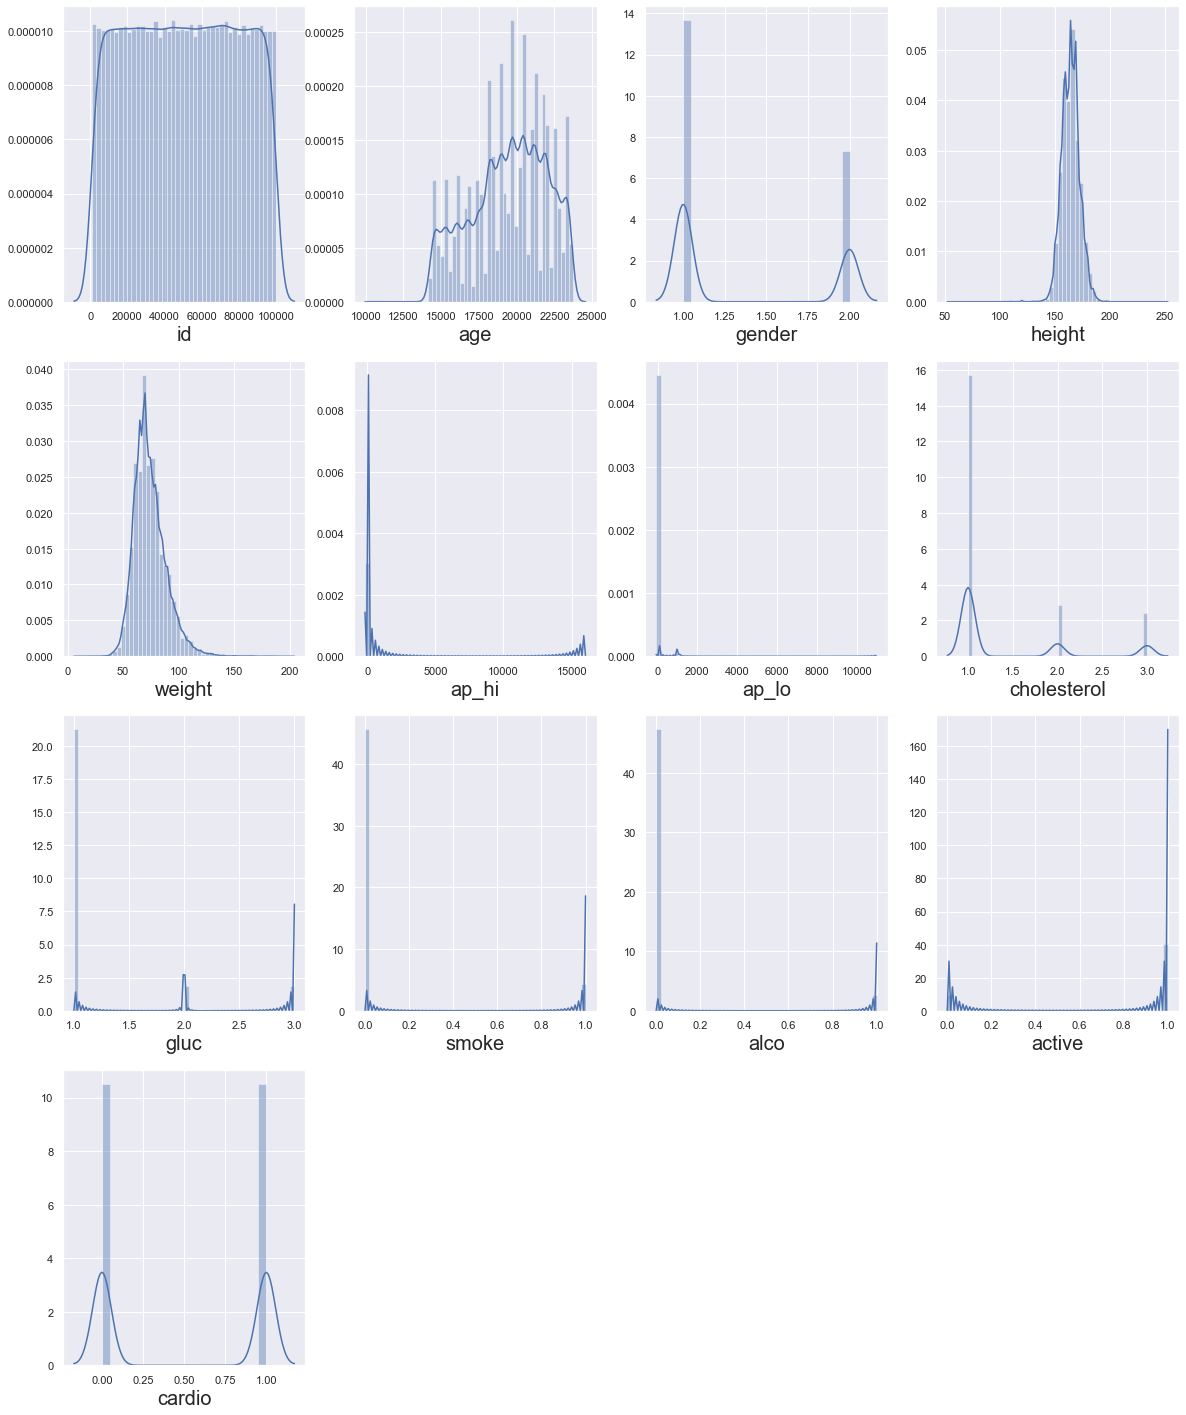

In [11]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=12 :     # as there are 12 columns in the data
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('cardio_train',fontsize=20)
    plotnumber+=1
plt.show()

In [12]:
data.drop('id', axis=1)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [13]:
data = data.drop('id', axis=1)

In [14]:
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,22431,1,163,72.0,135,80,1,2,0,0,0,1


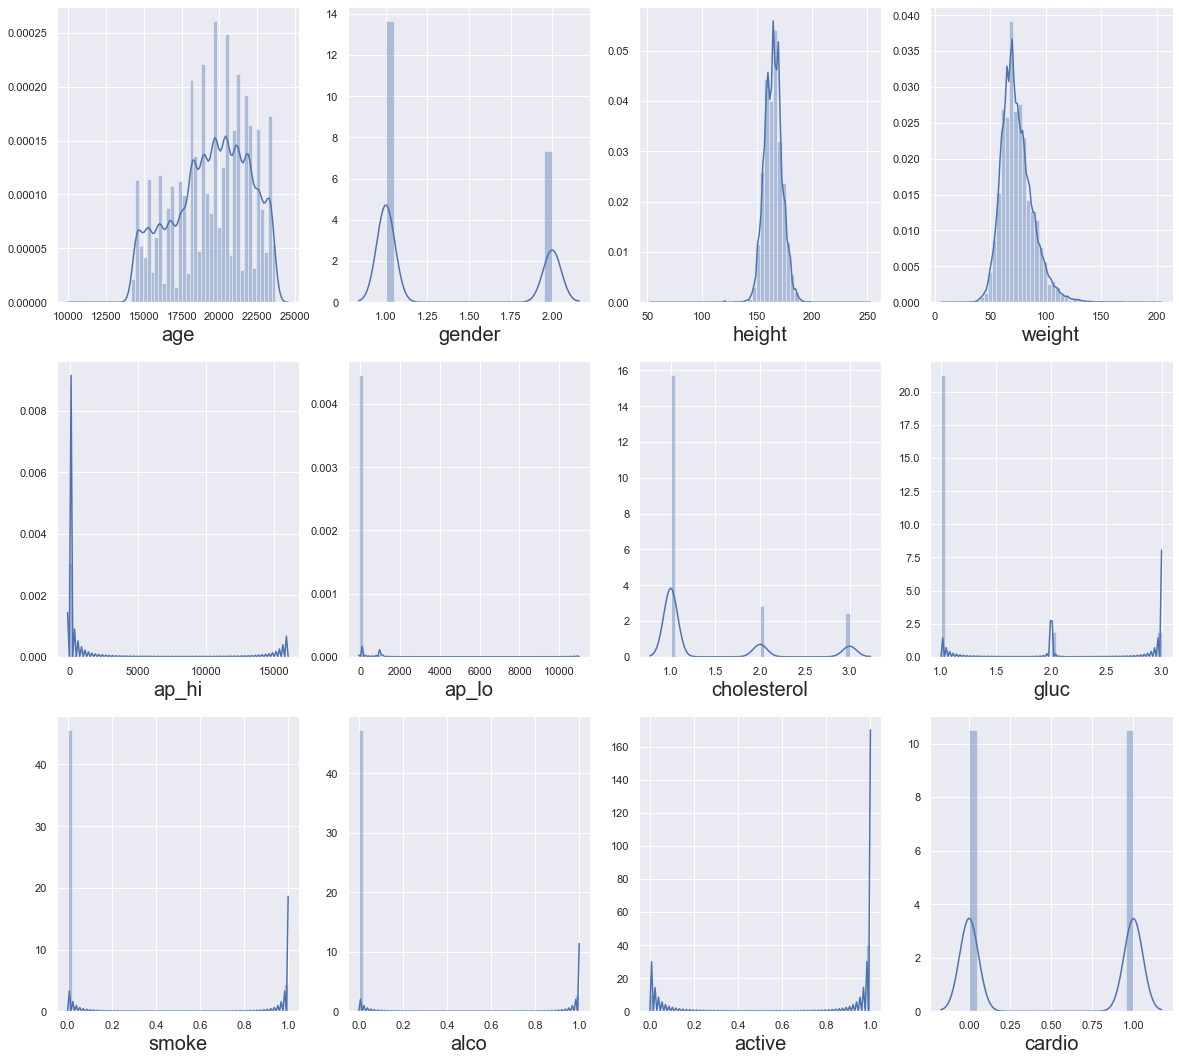

In [15]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=12 :     # as there are 12 columns in the data
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('cardio_train',fontsize=20)
    plotnumber+=1
plt.show()

In [16]:
# replacing zero values with the mean of the column
data['height'] = data['height'].replace(0,data['height'].mean())
data['ap_hi'] = data['ap_hi'].replace(0,data['ap_hi'].mean())
data['gluc'] = data['gluc'].replace(0,data['gluc'].mean())
data['alco'] = data['alco'].replace(0,data['alco'].mean())
data['active'] = data['active'].replace(0,data['active'].mean())

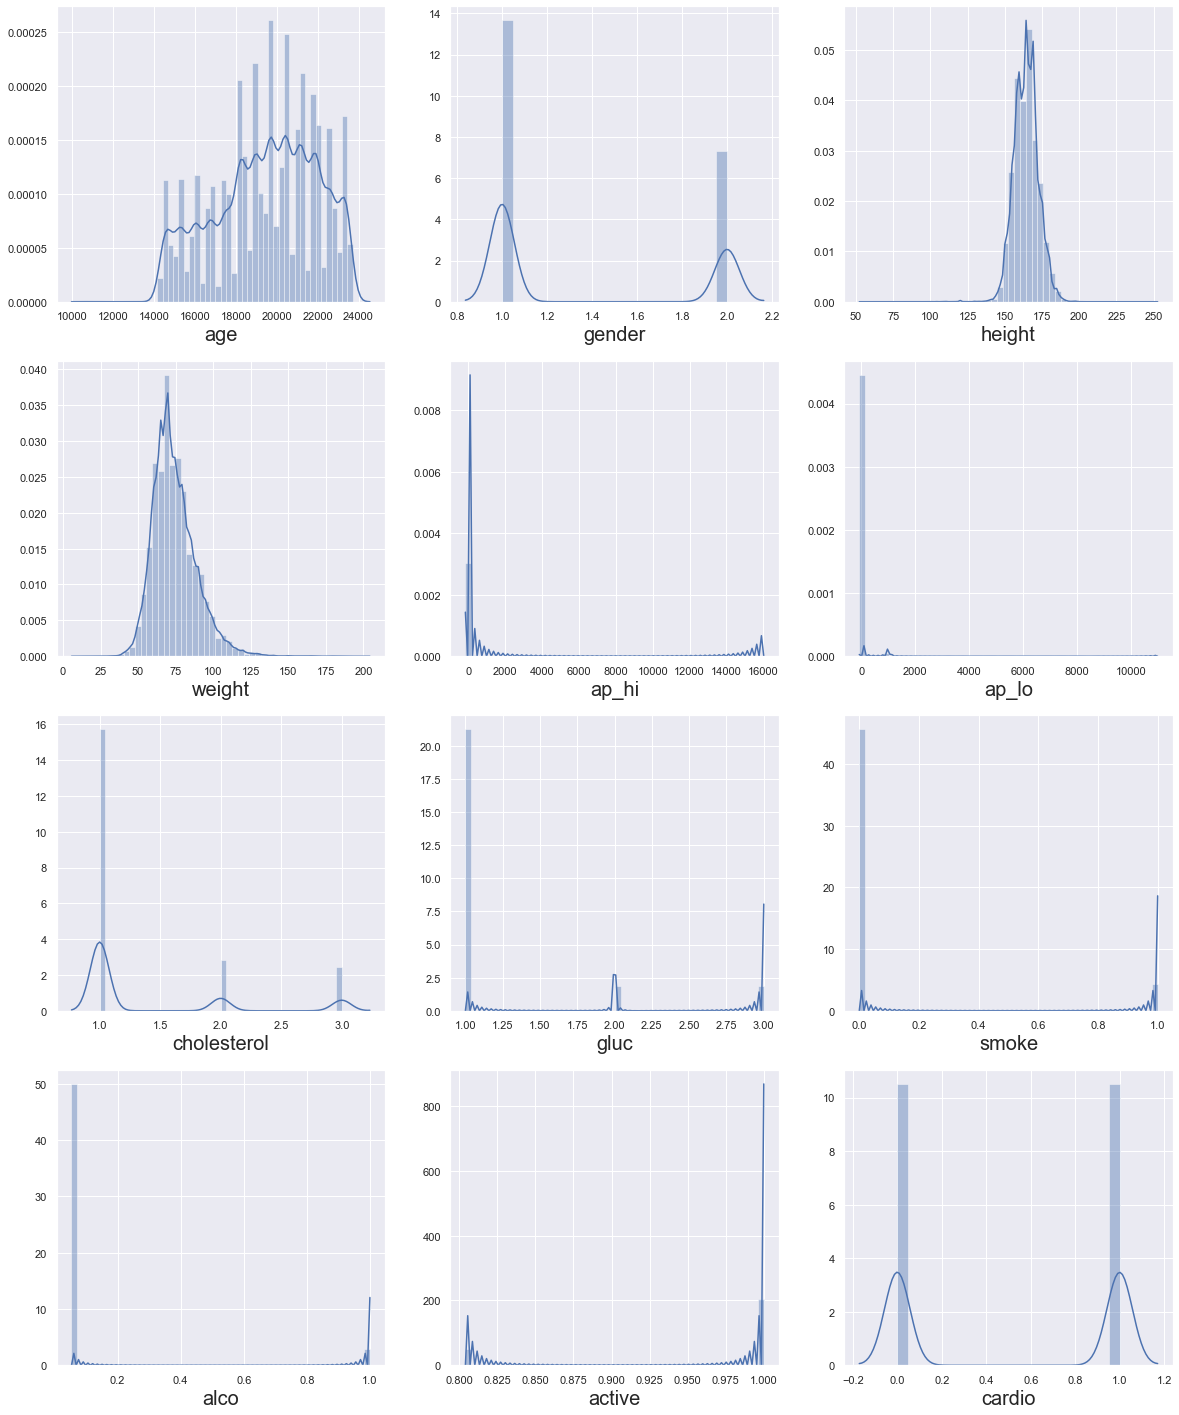

In [17]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=12 :     # as there are 12 columns in the data
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('cardio_train',fontsize=20)
    plotnumber+=1
plt.show()

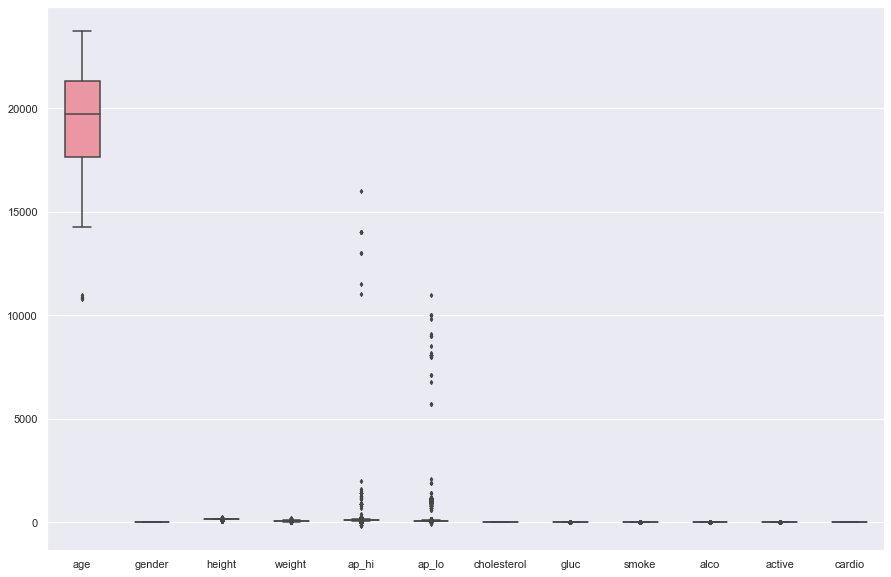

In [18]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)


In [19]:
q = data['age'].quantile(0.98)
# we are removing the top 2% data from the age column
data_cleaned = data[data['age']<q]
q = data_cleaned['ap_hi'].quantile(0.99)
# we are removing the top 1% data from the ap_hi column
data_cleaned  = data_cleaned[data_cleaned['ap_hi']<q]
q = data_cleaned['ap_lo'].quantile(0.99)
# we are removing the top 1% data from the ap_lo column
data_cleaned  = data_cleaned[data_cleaned['ap_lo']<q]

In [20]:
X = data.drop('cardio',axis=1)

In [21]:
y = data[['cardio']]

In [22]:
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,22469,1,155,69.0,130,80,2,2,0,0.053881,1.0
1,14648,1,163,71.0,110,70,1,1,0,0.053881,1.0
2,21901,1,165,70.0,120,80,1,1,0,0.053881,1.0
3,14549,2,165,85.0,120,80,1,1,1,1.000000,1.0
4,23393,1,155,62.0,120,80,1,1,0,0.053881,1.0


In [23]:
y.head()

,cardio
0,0
1,1
2,0
3,0
4,0


In [24]:
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=41)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [26]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
#rf = RandomForestClassifier()
kn = KNeighborsClassifier()

In [27]:
#training with all classifiers
lr.fit(X_train,Y_train)
#rf.fit(X_train,Y_train)
kn.fit(X_train,Y_train)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
#Individual metrics to validate highest score with AUC in ROC
lr.score(x_test,y_test)

0.7070298972642272

In [29]:
kn.score(x_test,y_test)

0.6813459540574859

In [30]:
dt.score(x_test,y_test)

0.6291123167493939

In [33]:
X = data.drop(columns = ['cardio'])
y = data['cardio']

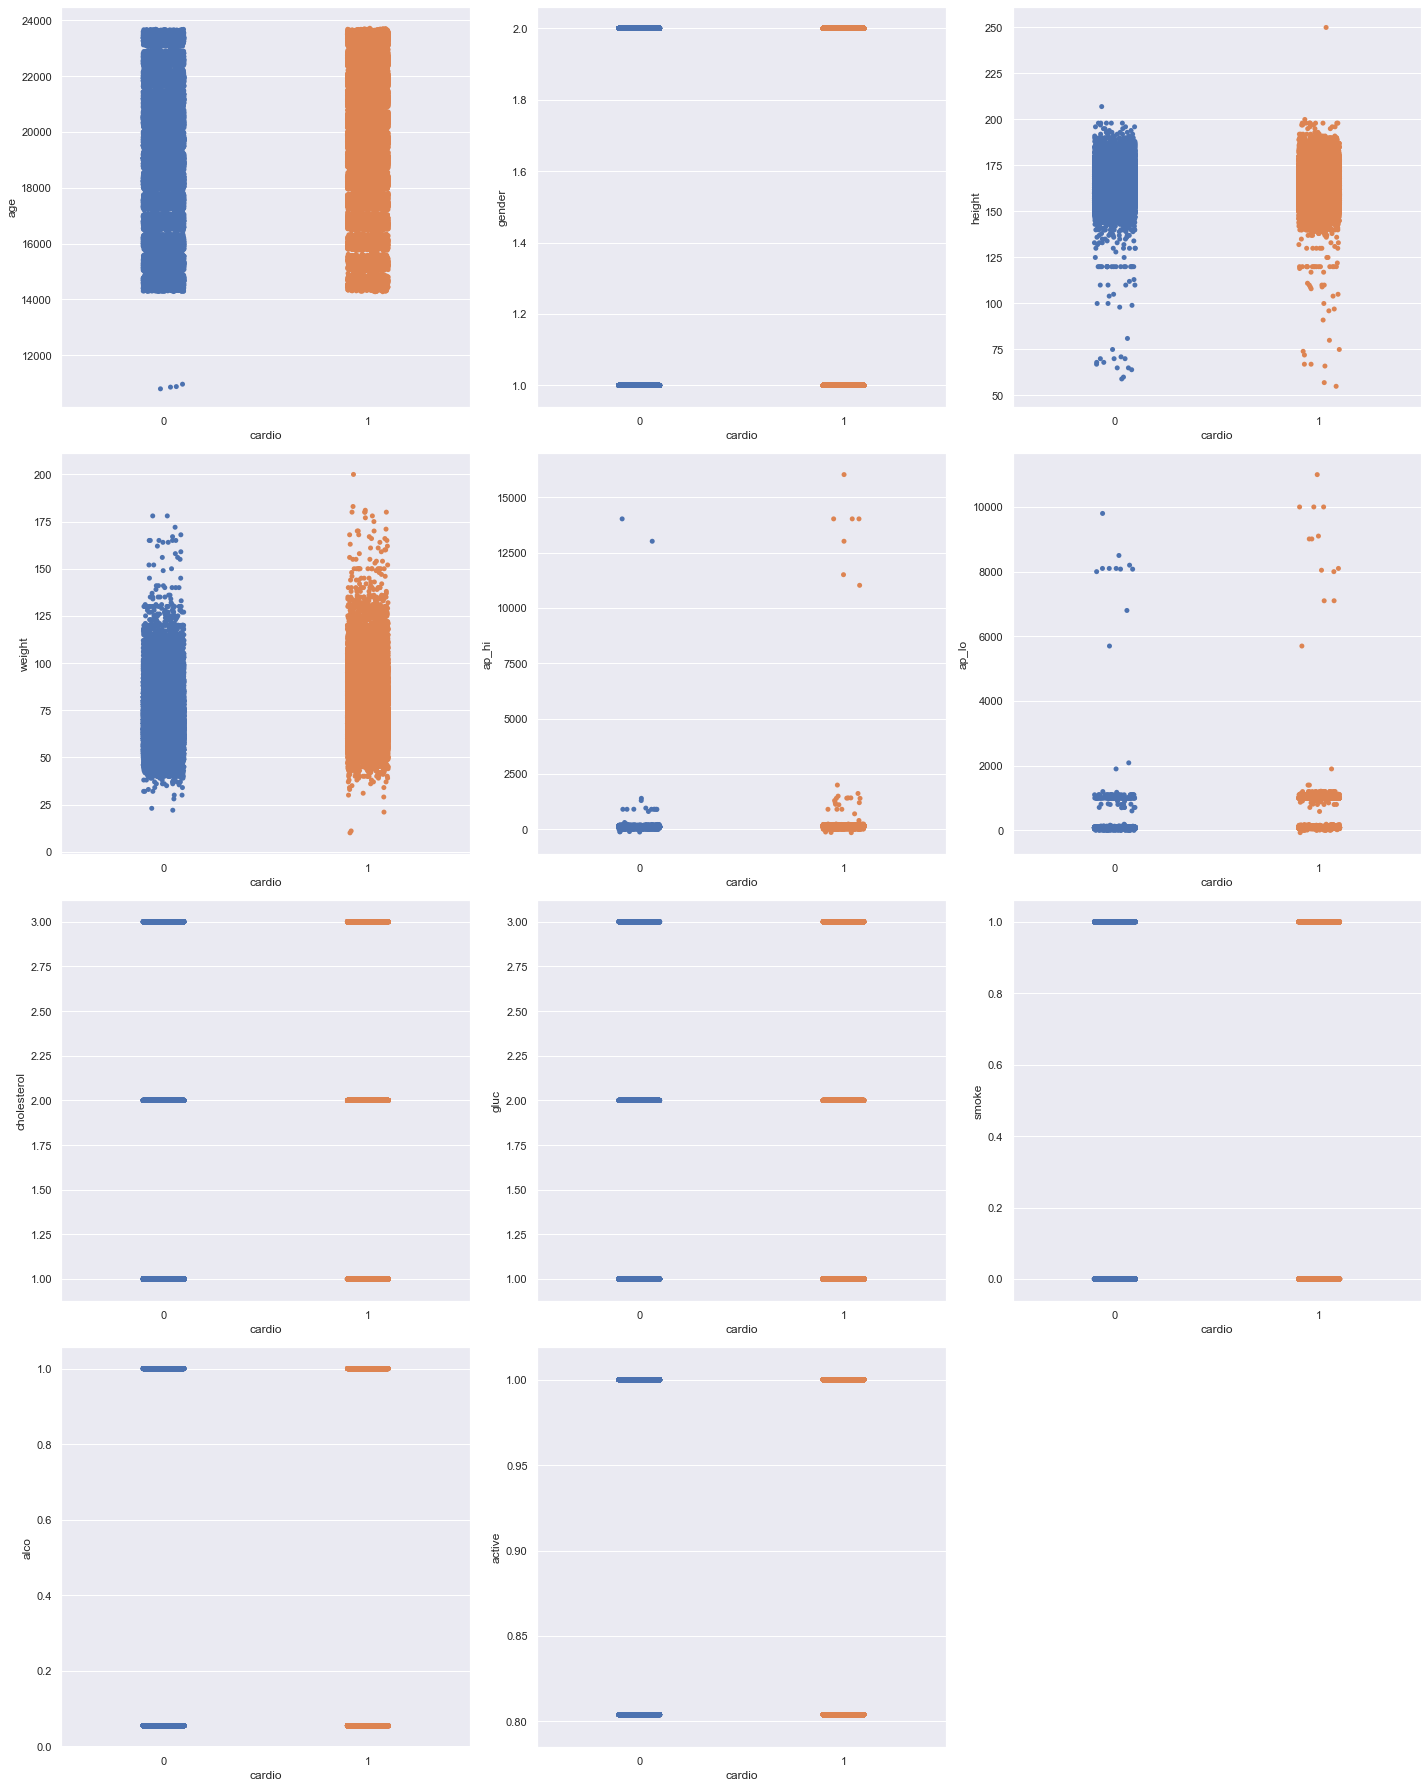

In [34]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=12 :
        ax = plt.subplot(4,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [35]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [36]:
X_scaled

array([[ 1.21601824, -0.73302344, -1.14099939, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [-1.95391548, -0.73302344, -0.16601717, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [ 0.98580185, -0.73302344,  0.07772839, ..., -0.31072844,
        -0.23864069,  0.49376463],
       ...,
       [-0.16325352,  1.36421285,  2.27143838, ..., -0.31072844,
         4.19040018, -2.02525646],
       [ 1.20061644, -0.73302344, -0.16601717, ..., -0.31072844,
        -0.23864069, -2.02525646],
       [ 0.43417421, -0.73302344,  0.68709227, ..., -0.31072844,
        -0.23864069,  0.49376463]])

In [37]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.038232,age
1,1.458609,gender
2,1.440426,height
3,1.133127,weight
4,1.001805,ap_hi
5,1.002879,ap_lo
6,1.299160,cholesterol
7,1.261151,gluc
8,1.246555,smoke
9,1.138881,alco


In [38]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [39]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

In [41]:
y_pred = log_reg.predict(x_test)

In [42]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7230751471776521

In [43]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[6640, 2021],
       [2777, 5888]], dtype=int64)

In [44]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [45]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7230751471776521

In [46]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.7666551206558134

In [47]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7051077837952638

In [48]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.7345945347936719

In [49]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7230852060290031

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

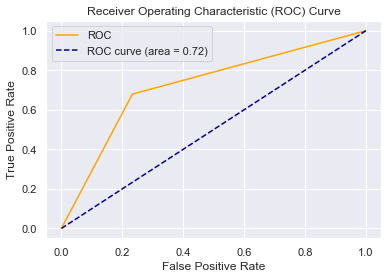

In [51]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

KNN

In [52]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [53]:
y_pred = knn.predict(x_test)

In [54]:
knn.score(x_train,y_train)

0.7643674843674844